In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_digits

In [14]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

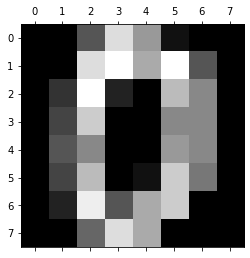

In [15]:
plt.gray() #기본 컬러맵을 gray scale로 설정한다.
plt.matshow(digits.images[0]) #행렬에 저장된 데이터를 기반으로 이미지를 표시한다.

In [16]:
X = digits.images
y = digits.target
m = y.size
image_size = 8 * 8 #이미지의 크기
num_label = np.arange(10) #나올 수 있는 숫자의 경우

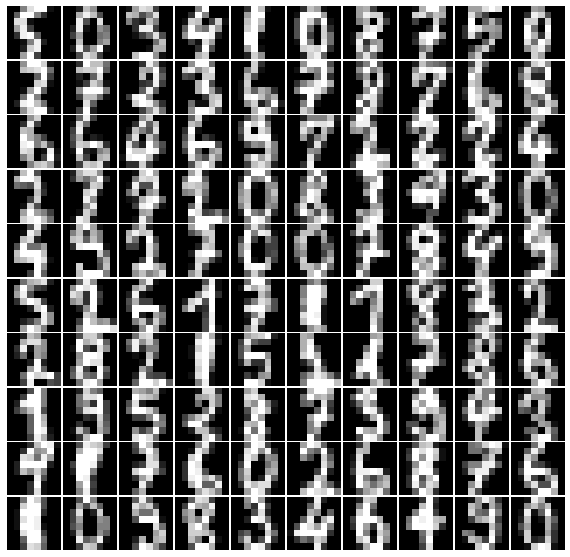

In [5]:
rand_indices = np.random.choice(m, 100, replace=False)
rand_image = X[rand_indices]
fig,axes = plt.subplots(10,10,figsize=(10,10))
fig.subplots_adjust(wspace = 0.025,hspace = 0.025)
axes = axes.ravel()
for i,ax in enumerate(axes):
  ax.matshow(rand_image[i])
  ax.axis('off')

In [17]:
X.shape #3차원 데이터 이므로 최적화를 쉽게 하기 위해 2차원 데이터로 변경해준다.

(1797, 8, 8)

In [28]:
X = (X-X.mean()) / X.std() #X 데이터에 정규화를 진행한다.

In [18]:
X = X.reshape((m, 64))
X = np.concatenate([np.ones((m,1)),X],axis = 1) #bias term을 추가 해준다.
X.shape

(1797, 65)

In [11]:
X[0] #X가 잘있는지 확인

array([ 1.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15.,
       10., 15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,
        4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,
        8.,  0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,
        5., 10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [9]:
def lrcost_function(theta, X, y, _lambda = 0.01):
  if y.dtype == bool: #y의 값이 bool로 들어오는 경우 int로 변환 해준다.
    y = y.astype(int)
  h = sigmoid(X.dot(theta))
  regularization = np.mean(np.power(theta[1:],2)) * (_lambda / 2)
  cost = -1 * np.mean(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization
  grad = (1 / m) * ((h - y).T.dot(X) + (_lambda * theta))
  return cost,grad

In [70]:
def check_cost(theta):
  res = [[] for _ in num_label]
  for i in num_label: # 나올 수 있는 모든 수에 대한 초기 비용을 구한다.
    res[i].append(lrcost_function(theta[i], X, y == i)[0]) #target의 값이 i라면 true로 값이 전달된다.
  return np.sum(res)


In [71]:
init_theta = np.zeros((10, image_size + 1)) #이미지가 8 * 8 이므로 64개의 변수가 존재하고 여기에 bias를 더해준다.
check_cost(init_theta) #각각의 수에 대한 초기 비용

6.931471805599454

#SGD 모델을 통해서 최적화를 해보자
* SGD 모델을 통한 최적화를 진행하고 이후 직접 최적화를 진행해 비교해보자

In [29]:
from sklearn.linear_model import SGDRegressor

In [30]:
def SGD_gradient(X,y):
    model = SGDRegressor(max_iter=2000, tol=1e-5, learning_rate='constant')
    res = [[] for _ in num_label]
    for i in num_label:
      model.fit(X, y == i)
      res[i].append(model.coef_)
    return res

In [31]:
SGD_theta = SGD_gradient(X,y) #0~9까지의 경우에 대한 theta의 값

In [ ]:
SGD_theta

#Scipy의 최적화 함수를 활용해 최적화 해보기
* Scipy를 활용해 최적화를 진행해보자

In [34]:
from scipy import optimize

In [49]:
#scipy 내부에 존재하는 minimize 메서드를 통해 문제를 해결합니다.
def Scipy_gradient(X,y,lambda_= 0.1):
  all_theta = [[] for _ in num_label]
  options = {'maxiter':2000}
  for c in num_label: # classify 0 to 9
    initial_theta = np.zeros(image_size + 1)
    #minimize함수를 통해 파라미터 최적화를 진행합니다.
    res = optimize.minimize(lrcost_function,
                            initial_theta, 
                            (X, (y == c), lambda_),
                            jac = True, method ='CG', 
                            options=options)
    #연산한 세타값을 저장합니다. 
    all_theta[c] = res.x
  return all_theta

In [50]:
scipy_theta = np.array(Scipy_gradient(X,y))

In [51]:
scipy_theta[1]

array([ 0.59322612,  0.74834192,  0.55433028, -0.17419175,  0.31743811,
       -1.71505321,  0.64590149, -0.08398171,  0.58053604,  0.7440616 ,
       -0.71374934, -1.20046107, -0.20734133,  0.61613809,  0.51486763,
       -0.69270544,  0.62150621,  0.79325327,  0.47888824,  0.29616781,
        2.23751067,  1.7670458 , -0.19042438, -0.21264429,  0.69598497,
        0.7683841 ,  0.32009842,  0.04764704,  0.9383977 , -0.05462184,
        0.5398733 , -0.4956501 ,  0.74744013,  0.74834192, -0.20501186,
       -0.03382577, -0.15603384,  0.03763412, -0.3858718 , -0.85451872,
        0.74834192,  0.74119627, -0.62219845, -0.51024349,  0.34134752,
        0.46439671, -0.61546404, -0.80974498,  0.73601768,  0.73232189,
        0.16489431, -0.28237221,  0.32764388,  0.31253119, -0.05404979,
       -0.6050276 ,  0.89127252,  0.74364174,  0.53845078, -0.60184726,
        0.02277895,  0.03935053,  0.75374639,  0.08556399,  0.95802238])

#이제 로지스틱 회귀를 활용한 다중 분류 알고리즘으로 예측해보자!!
* 우리는 지금까지 로지스틱 회귀를 활용해 one-vs-all 문제를 해결해봤다.
* 파라미터 값도 전부 도출했으니 이제 결과를 확인해보자

In [33]:
def predict(scipy_theta, SGD_theta):
   sci_res = np.argmax(X.dot(scipy_theta.T), axis = 1) 
   sgd_res = np.argmax(X.dot(SGD_theta.T), axis = 1) 
   return sci_res, sgd_res

### 연산된 행렬 값 중 row를 기준으로 가장 값이 큰 인덱스를 찾습니다.
* (1797,65) * (65,10) => (1797,10)으로 하나의 X이미지에 각각의 숫자를 분류하는데 최적화 된 theta값을 모두 곱해봅니다.
* 어두운 부분은 0이고 밝은 부분은 1로 이미지 상에 존재하므로 값이 많이 일치될 수록 theta와 X 곱셈의 결과가 클 것입니다.
* 이에 따라 argmax함수를 사용해 행 별로 가장 가능성이 유력한 인덱스를 찾아 해당 값을 정답으로 여깁니다. 만약 1번째 인덱스의 값이 가장 크다면 현재 데이터는 1일 가능성이 가장 높다고 생각합니다.

In [55]:
sci_pre, sgd_pre = predict(scipy_theta, SGD_theta)

In [39]:
np.mean(y == sgd_pre) * 100

91.48580968280467

In [40]:
np.mean(y== sci_pre) * 100

97.21758486366166

### SGD와 minimize
* SGD를 통한 최적화는 약 91% scipy_minimze를 사용한 결과는 약 97%가 도출 됐습니다.
* 이 정도면 썩 괜찮은 결과 아닐까요..?


In [73]:
print(check_cost(scipy_theta)) #비용함수의 값이 얼마나 줄어 들었는지 확인해보자.

0.31213660017419814


In [42]:
df = pd.DataFrame([sci_pre, y, y == sci_pre]).T
df.columns=['predict','y','match']

In [43]:
df

,predict,y,match
0,0,0,True
1,1,1,True
2,2,2,True
3,3,3,True
4,4,4,True
...,...,...,...
1792,9,9,True
1793,0,0,True
1794,8,8,True
1795,9,9,True


### 눈으로 확인해보기
* 마지막으로 정말 우리 모델이 정확하게 예측을 했는지 눈으로 한번 확인해 봅시다.

my precition is : 6
my precition is : 7
my precition is : 8
my precition is : 6
my precition is : 6
my precition is : 6
my precition is : 2
my precition is : 7
my precition is : 7
my precition is : 4


<Figure size 432x288 with 0 Axes>

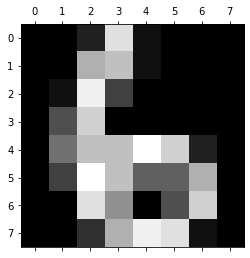

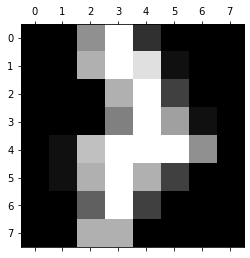

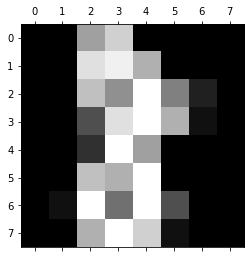

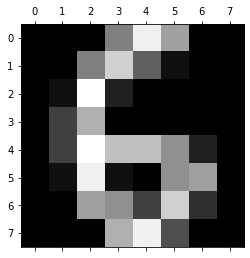

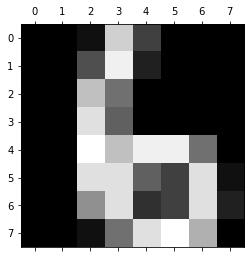

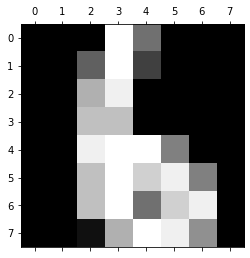

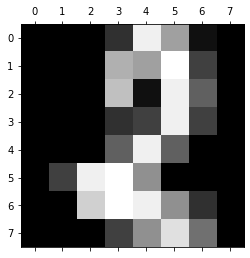

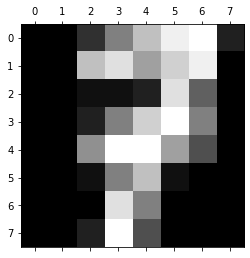

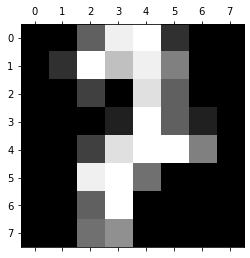

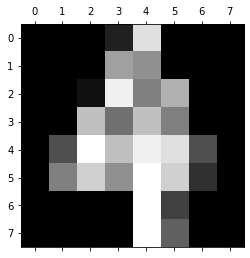

In [56]:
plt.gray() 
for i in np.random.randint(1000,size=10):
  print(f"my precition is : {df['predict'].iloc[i]}")
  plt.matshow(digits.images[i])